In [144]:
import numpy as np
import matplotlib.pyplot as plt
import wave_bwf_rf64 
import contextlib
import math
from scipy import signal

In [163]:
filename = "most.wav"
with contextlib.closing(wave_bwf_rf64.open(filename,'rb')) as f:
    fs = f.getframerate()
    num_frames = f.getnframes()
    iq_samples = f.readframes(num_frames)
iq_samples = np.frombuffer(iq_samples, dtype=np.int16) 
I = iq_samples[0::2]
Q = iq_samples[1::2]
iq_samples = I + 1j * Q
iq_samples = np.abs(iq_samples)
fs

2400000

In [164]:
from lut import egyszerusit
from fractions import Fraction
fs = int(fs)
print(fs)
n = 8
n = n*(10**6)
print(n)
up,down = egyszerusit(n,fs)
# up/down * fs = fs'
# legegyszerűbb alakra kellene hozni, legyen az az Up/down arány
#up = 5
#down = 3
print(up,down)
iq_samples = signal.resample_poly(iq_samples,up = up,down=down)
#len(iq_samples)
fs

2400000
8000000
10 3


2400000

1.25e-07
104


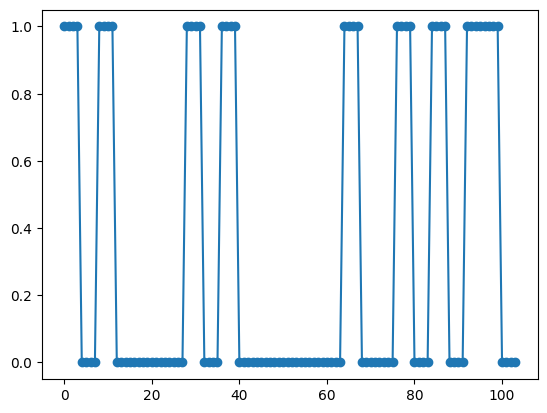

In [165]:
fs = fs*up/down
Ts = 1/fs
length = num_frames*Ts
#--------PREAMBLE--------#
a1 = 0
a2 = 0.5*10**-6
b1 = 1*10**-6
b2 = 1.5*10**-6
c1 = 3.5*10**-6
c2 = 4*10**-6
d1 = 4.5*10**-6
d2 = 5*10**-6
#------------------------#
#-----------DF-----------##     10 01 01 01 10       #
e1 = 8*10**-6
e2 = 8.5*10**-6
f1 = 9.5*10**-6
f2 = 10*10**-6
g1 = 10.5*10**-6
g2 = 11*10**-6
h1 = 11.5*10**-6
h2 = 12.5*10**-6
#------------------------#
preamble_df = np.arange(0*10**-6,13*10**-6,Ts)
print(Ts)
for i in range(len(preamble_df)):
    if  ((a1 <= preamble_df[i] < a2) or (d1 <= preamble_df[i] < d2) or (c1 <= preamble_df[i] < c2) or (b1 <= preamble_df[i] < b2)) or ((e1 <= preamble_df[i] < e2) or (f1 <= preamble_df[i] < f2) or (g1 <= preamble_df[i] < g2) or (h1 <= preamble_df[i] < h2)):
        preamble_df[i] = 1
    else:
        preamble_df[i] = 0
time_preamble = np.arange(0,len(preamble_df)*Ts,Ts)
plt.plot(preamble_df,marker = "o")
plt.show
print(len(preamble_df))

8MSPS

In [166]:
# minta keresése
arg = list()
for i in range(len(iq_samples)-len(preamble_df)-1):
# az 1 esek nagyobbak mint a 0-k
    if (iq_samples[i] > iq_samples[i+4] and
        iq_samples[i+1] > iq_samples[i+5] and
        iq_samples[i+2] > iq_samples[i+6] and
        iq_samples[i+3] > iq_samples[i+7] and
        
        iq_samples[i+8] > iq_samples[i+12] and
        iq_samples[i+9] > iq_samples[i+13] and
        iq_samples[i+10] > iq_samples[i+14] and
        iq_samples[i+11] > iq_samples[i+15] and

        iq_samples[i+28] > iq_samples[i+27] and
        iq_samples[i+29] > iq_samples[i+26] and
        iq_samples[i+30] > iq_samples[i+25] and
        iq_samples[i+31] > iq_samples[i+24] and  

        iq_samples[i+36] > iq_samples[i+32] and
        iq_samples[i+37] > iq_samples[i+33] and
        iq_samples[i+38] > iq_samples[i+34] and
        iq_samples[i+39] > iq_samples[i+35] and

        iq_samples[i+64] > iq_samples[i+60] and
        iq_samples[i+65] > iq_samples[i+61] and
        iq_samples[i+66] > iq_samples[i+62] and
        iq_samples[i+67] > iq_samples[i+63] and

        iq_samples[i+99] > iq_samples[i+103] and
        iq_samples[i+98] > iq_samples[i+102] and
        iq_samples[i+97] > iq_samples[i+101] and
        iq_samples[i+96] > iq_samples[i+100]):
            arg.append(i)
len(arg)

5476

4MSPS

In [148]:
# minta keresése
arg = list()
for i in range(len(iq_samples)-len(preamble_df)-1):
# az 1 esek nagyobbak mint a 0-k
    if (iq_samples[i] > iq_samples[i+2] and
        iq_samples[i+1] > iq_samples[i+2] and
        iq_samples[i+3] < iq_samples[i+4] and
        iq_samples[i+5] > iq_samples[i+3] and

        iq_samples[i+14] > iq_samples[i+13] and
        iq_samples[i+15] > iq_samples[i+13] and
        iq_samples[i+17] < iq_samples[i+19] and
        iq_samples[i+17] < iq_samples[i+18] and  

        iq_samples[i+32] > iq_samples[i+31] and
        iq_samples[i+33] > iq_samples[i+31] and

        iq_samples[i+38] > iq_samples[i+37] and
        iq_samples[i+39] > iq_samples[i+37] and

        iq_samples[i+42] > iq_samples[i+41] and
        iq_samples[i+43] > iq_samples[i+41] and

        iq_samples[i+49] > iq_samples[i+45] and
        iq_samples[i+46] > iq_samples[i+45]):
            arg.append(i)
len(arg)

35093

In [149]:
"""#átlagosan a 0-k legyenek kisebbek mint az 1-esek
max_zeros = 0
min_ones = 0
for i in arg:
    max_zeros = np.max([iq_samples[i+2],iq_samples[i+3],
                        iq_samples[i+3*2],iq_samples[i+3*2+1],
                        iq_samples[i+4*2],iq_samples[i+4*2+1],
                        iq_samples[i+5*2],iq_samples[i+5*2+1],
                        iq_samples[i+6*2],iq_samples[i+6*2+1],
                        iq_samples[i+10*2],iq_samples[i+10*2+1],
                       iq_samples[i+11*2],iq_samples[i+11*2+1],
                       iq_samples[i+12*2],iq_samples[i+12*2+1],
                       iq_samples[i+13*2],iq_samples[i+13*2+1],
                       iq_samples[i+14*2],iq_samples[i+14*2+1],
                       iq_samples[i+15*2],iq_samples[i+15*2+1]
                       ])
    min_ones = np.min([iq_samples[i],iq_samples[i+1],iq_samples[i+4],iq_samples[i+5],iq_samples[i+7*2],iq_samples[i+7*2+1],iq_samples[i+9*2],
                       iq_samples[i+9*2+1],iq_samples[i+16*2],iq_samples[i+16*2+1],
                       iq_samples[i+19*2],iq_samples[i+19*2+1],iq_samples[i+21*2],iq_samples[i+21*2+1],iq_samples[i+23*2],iq_samples[i+23*2+1],
                       iq_samples[i+24*2],iq_samples[i+24*2+1]
                       ])
    if (min_ones < max_zeros):
        arg.remove(i)
len(arg)"""

'#átlagosan a 0-k legyenek kisebbek mint az 1-esek\nmax_zeros = 0\nmin_ones = 0\nfor i in arg:\n    max_zeros = np.max([iq_samples[i+2],iq_samples[i+3],\n                        iq_samples[i+3*2],iq_samples[i+3*2+1],\n                        iq_samples[i+4*2],iq_samples[i+4*2+1],\n                        iq_samples[i+5*2],iq_samples[i+5*2+1],\n                        iq_samples[i+6*2],iq_samples[i+6*2+1],\n                        iq_samples[i+10*2],iq_samples[i+10*2+1],\n                       iq_samples[i+11*2],iq_samples[i+11*2+1],\n                       iq_samples[i+12*2],iq_samples[i+12*2+1],\n                       iq_samples[i+13*2],iq_samples[i+13*2+1],\n                       iq_samples[i+14*2],iq_samples[i+14*2+1],\n                       iq_samples[i+15*2],iq_samples[i+15*2+1]\n                       ])\n    min_ones = np.min([iq_samples[i],iq_samples[i+1],iq_samples[i+4],iq_samples[i+5],iq_samples[i+7*2],iq_samples[i+7*2+1],iq_samples[i+9*2],\n                       iq_samp

In [150]:
"""# átlagosan legyenek elég messze a 0-k és 1-esek
A  = 0
for i in arg:
    min =np.min([iq_samples[i+3*2],iq_samples[i+3*2+1],
                        iq_samples[i+4*2],iq_samples[i+4*2+1],
                        iq_samples[i+5*2],iq_samples[i+5*2+1],
                        iq_samples[i+6*2],iq_samples[i+6*2+1],
                        iq_samples[i+10*2],iq_samples[i+10*2+1],
                       iq_samples[i+11*2],iq_samples[i+11*2+1],
                       iq_samples[i+12*2],iq_samples[i+12*2+1],
                       iq_samples[i+13*2],iq_samples[i+13*2+1],
                       iq_samples[i+14*2],iq_samples[i+14*2+1],
                       iq_samples[i+15*2],iq_samples[i+15*2+1]
                       ])
    max = np.max([iq_samples[i],iq_samples[i+1],iq_samples[i+4],iq_samples[i+5],iq_samples[i+7*2],iq_samples[i+7*2+1],iq_samples[i+9*2],
                       iq_samples[i+9*2+1],iq_samples[i+16*2],iq_samples[i+16*2+1],
                       iq_samples[i+19*2],iq_samples[i+19*2+1],iq_samples[i+21*2],iq_samples[i+21*2+1],iq_samples[i+23*2],iq_samples[i+23*2+1],
                       iq_samples[i+24*2],iq_samples[i+24*2+1]
                       ])
    A = max-min
    avg_zeros = np.average([iq_samples[i+3*2],iq_samples[i+3*2+1],
                        iq_samples[i+4*2],iq_samples[i+4*2+1],
                        iq_samples[i+5*2],iq_samples[i+5*2+1],
                        iq_samples[i+6*2],iq_samples[i+6*2+1],
                        iq_samples[i+10*2],iq_samples[i+10*2+1],
                       iq_samples[i+11*2],iq_samples[i+11*2+1],
                       iq_samples[i+12*2],iq_samples[i+12*2+1],
                       iq_samples[i+13*2],iq_samples[i+13*2+1],
                       iq_samples[i+14*2],iq_samples[i+14*2+1],
                       iq_samples[i+15*2],iq_samples[i+15*2+1]
                       ])
    avg_ones = np.average([iq_samples[i],iq_samples[i+1],iq_samples[i+4],iq_samples[i+5],iq_samples[i+7*2],iq_samples[i+7*2+1],iq_samples[i+9*2],
                       iq_samples[i+9*2+1],iq_samples[i+16*2],iq_samples[i+16*2+1],
                       iq_samples[i+19*2],iq_samples[i+19*2+1],iq_samples[i+21*2],iq_samples[i+21*2+1],iq_samples[i+23*2],iq_samples[i+23*2+1],
                       iq_samples[i+24*2],iq_samples[i+24*2+1]
                       ])
    if ((avg_ones-avg_zeros) < (3*A/4)):
        arg.remove(i)
len(arg)"""

'# átlagosan legyenek elég messze a 0-k és 1-esek\nA  = 0\nfor i in arg:\n    min =np.min([iq_samples[i+3*2],iq_samples[i+3*2+1],\n                        iq_samples[i+4*2],iq_samples[i+4*2+1],\n                        iq_samples[i+5*2],iq_samples[i+5*2+1],\n                        iq_samples[i+6*2],iq_samples[i+6*2+1],\n                        iq_samples[i+10*2],iq_samples[i+10*2+1],\n                       iq_samples[i+11*2],iq_samples[i+11*2+1],\n                       iq_samples[i+12*2],iq_samples[i+12*2+1],\n                       iq_samples[i+13*2],iq_samples[i+13*2+1],\n                       iq_samples[i+14*2],iq_samples[i+14*2+1],\n                       iq_samples[i+15*2],iq_samples[i+15*2+1]\n                       ])\n    max = np.max([iq_samples[i],iq_samples[i+1],iq_samples[i+4],iq_samples[i+5],iq_samples[i+7*2],iq_samples[i+7*2+1],iq_samples[i+9*2],\n                       iq_samples[i+9*2+1],iq_samples[i+16*2],iq_samples[i+16*2+1],\n                       iq_samples[i+1

In [151]:
"""# az összes 0 legyen az átlag 1 alatt
for i in arg:
    avg_ones = np.average([iq_samples[i],iq_samples[i+1],iq_samples[i+4],iq_samples[i+5],iq_samples[i+7*2],iq_samples[i+7*2+1],iq_samples[i+9*2],
                       iq_samples[i+9*2+1],iq_samples[i+16*2],iq_samples[i+16*2+1],
                       iq_samples[i+19*2],iq_samples[i+19*2+1],iq_samples[i+21*2],iq_samples[i+21*2+1],iq_samples[i+23*2],iq_samples[i+23*2+1],
                       iq_samples[i+24*2],iq_samples[i+24*2+1]
                       ])
    if (iq_samples[i+3*2] > avg_ones or
        iq_samples[i+3*2+1] > avg_ones or
        iq_samples[i+4*2] > avg_ones or
        iq_samples[i+4*2+1] > avg_ones or
        iq_samples[i+5*2] > avg_ones or
        iq_samples[i+5*2+1] > avg_ones or
        iq_samples[i+6*2] > avg_ones or
        iq_samples[i+6*2+1] > avg_ones or
        iq_samples[i+10*2] > avg_ones or
        iq_samples[i+10*2+1] > avg_ones or
        iq_samples[i+11*2] > avg_ones or
        iq_samples[i+11*2+1] > avg_ones or
        iq_samples[i+12*2] > avg_ones or
        iq_samples[i+12*2+1] > avg_ones or
        iq_samples[i+13*2] > avg_ones or
        iq_samples[i+13*2+1] > avg_ones or
        iq_samples[i+14*2] > avg_ones or
        iq_samples[i+14*2+1] > avg_ones or
        iq_samples[i+15*2] > avg_ones or
        iq_samples[i+15*2+1] > avg_ones
        ):
        arg.remove(i)
len(arg)"""

'# az összes 0 legyen az átlag 1 alatt\nfor i in arg:\n    avg_ones = np.average([iq_samples[i],iq_samples[i+1],iq_samples[i+4],iq_samples[i+5],iq_samples[i+7*2],iq_samples[i+7*2+1],iq_samples[i+9*2],\n                       iq_samples[i+9*2+1],iq_samples[i+16*2],iq_samples[i+16*2+1],\n                       iq_samples[i+19*2],iq_samples[i+19*2+1],iq_samples[i+21*2],iq_samples[i+21*2+1],iq_samples[i+23*2],iq_samples[i+23*2+1],\n                       iq_samples[i+24*2],iq_samples[i+24*2+1]\n                       ])\n    if (iq_samples[i+3*2] > avg_ones or\n        iq_samples[i+3*2+1] > avg_ones or\n        iq_samples[i+4*2] > avg_ones or\n        iq_samples[i+4*2+1] > avg_ones or\n        iq_samples[i+5*2] > avg_ones or\n        iq_samples[i+5*2+1] > avg_ones or\n        iq_samples[i+6*2] > avg_ones or\n        iq_samples[i+6*2+1] > avg_ones or\n        iq_samples[i+10*2] > avg_ones or\n        iq_samples[i+10*2+1] > avg_ones or\n        iq_samples[i+11*2] > avg_ones or\n        iq_sa

In [152]:
"""conv = list()
max_arg = 0
for i in range(len(arg)):
    a = np.correlate(preamble_df,iq_samples[arg[i]:arg[i]+len(preamble_df)],mode="full")
    a = np.max(a)
    conv.append(a)
max_iq = np.argmax(conv)
max_value = np.max(conv)
print(len(conv))
# az iq_samples ezen mintasoroazta az arg[max_iq]-adik eleme az iq_samples nek"""

'conv = list()\nmax_arg = 0\nfor i in range(len(arg)):\n    a = np.correlate(preamble_df,iq_samples[arg[i]:arg[i]+len(preamble_df)],mode="full")\n    a = np.max(a)\n    conv.append(a)\nmax_iq = np.argmax(conv)\nmax_value = np.max(conv)\nprint(len(conv))\n# az iq_samples ezen mintasoroazta az arg[max_iq]-adik eleme az iq_samples nek'

8MSPS

In [167]:
# ki kellene listázni az összes 0 hibás üzenetet
# a minták az iq_samples[arg[i]:arg[i]+len(preamble_df)]
from crccheck.crc import Crc
nyers_rossz = []
uzenet = 0
data = 0
bin_data = 0
df_bits_string=ca_bits_string=icao_bits_string=me_bits_string=pi_bits_string = 0
messages = list()
raw_messages = list()
for i in range(len(arg)):
    if ((arg[i] + 960) > len(iq_samples)):
        continue
    start = arg[i]
    stop1 = start + math.floor(8*10**-6/Ts)
    PREAMBLE = iq_samples[start:stop1]
    #----------------DF mintái------------------#
    stop2 = stop1 + math.floor(5*10**-6/Ts)
    DF = iq_samples[stop1:stop2]
    #----------------CA mintái------------------#
    stop3 = stop2 + math.floor(3*10**-6/Ts)
    CA = iq_samples[stop2:stop3]
    #----------------ICAO mintái------------------#
    stop4 = stop3 + math.floor(24*10**-6/Ts)
    ICAO = iq_samples[stop3:stop4]
    #----------------ME mintái------------------#
    stop5 = stop4 + math.floor(56*10**-6/Ts)
    ME = iq_samples[stop4:stop5]
    #----------------PI mintái------------------#
    stop6 = stop5 + math.floor(24*10**-6/Ts)
    PI = iq_samples[stop5:stop6]
    full = np.concatenate([PREAMBLE,DF,CA,ICAO,ME,PI])
    bits = np.zeros(112,dtype = np.int64)
    full_bitek = full
    
    preamble_bits = full_bitek[:16*4]
    full_bitek = full_bitek[16*4:]
    nyers_rossz.append(full_bitek)
    raw_mess = list()
    #-------------------------8 MSPS-------------------------------#
    for n in range(112):
        if (sum(full_bitek[8*n:8*n+4]) < sum(full_bitek[8*n+4:8*n+8])):
            bits[n] = 0
            raw_mess.append(full_bitek[8*n:8*n+8])
        elif (sum(full_bitek[8*n:8*n+4]) > sum(full_bitek[8*n+4:8*n+8])):
            bits[n] = 1
        else:
            bits[n] = -1
    df_bits = bits[:5]
    #df_bits = ''.join(str(b) for b in df_bits.astype(int))
    ca_bits = bits[5:8]
    #ca_bits = ''.join(str(b) for b in ca_bits.astype(int))
    icao_bits = bits[8:32]
    #icao_bits = ''.join(str(b) for b in icao_bits.astype(int))
    me_bits = bits[32:88]
    pi_bits = bits[88:]
    type_code_bits = me_bits[:5]
    type_code_bits = ''.join(str(b) for b in type_code_bits.astype(int))
    #print(df_bits,ca_bits,icao_bits,me_bits,pi_bits,type_code_bits)
    ADS_B = Crc(width=24,poly=0x1FFF409,initvalue=0,xor_output=0,reflect_input=False,reflect_output=False)
    df_bits_string = ''.join(str(b) for b in df_bits)
    ca_bits_string = ''.join(str(b) for b in ca_bits)
    icao_bits_string = ''.join(str(b) for b in icao_bits)
    me_bits_string = ''.join(str(b) for b in me_bits)
    pi_bits_string = ''.join(str(b) for b in pi_bits)
    data = df_bits_string+ca_bits_string+icao_bits_string+me_bits_string+pi_bits_string
    bin_data = data
    data = hex(int(data, 2))[2:]
    if len(data) % 2 != 0:
        data = "0" + data
    
    data_ = bytes.fromhex(data)    
    err_mess = list()
    remainder = ADS_B.calc(data_)
    if (remainder == 0):
        messages.append(data)
        raw_messages.append(raw_mess)
        
    else:
        err_mess.append(data)
        raw_messages.append(raw_mess)
        
print(len(messages),len(err_mess))
print(err_mess[0])

0 1
fdeafde58271d8a3f7ce700f21b4


4MSPS

In [153]:
# ki kellene listázni az összes 0 hibás üzenetet
# a minták az iq_samples[arg[i]:arg[i]+len(preamble_df)]
from crccheck.crc import Crc
nyers_rossz = []
uzenet = 0
data = 0
bin_data = 0
df_bits_string=ca_bits_string=icao_bits_string=me_bits_string=pi_bits_string = 0
messages = list()
raw_messages = list()
for i in range(len(arg)):
    if ((arg[i] + 480) > len(iq_samples)):
        continue
    start = arg[i]
    stop1 = start + math.floor(8*10**-6/Ts)
    PREAMBLE = iq_samples[start:stop1]
    #----------------DF mintái------------------#
    stop2 = stop1 + math.floor(5*10**-6/Ts)
    DF = iq_samples[stop1:stop2]
    #----------------CA mintái------------------#
    stop3 = stop2 + math.floor(3*10**-6/Ts)
    CA = iq_samples[stop2:stop3]
    #----------------ICAO mintái------------------#
    stop4 = stop3 + math.floor(24*10**-6/Ts)
    ICAO = iq_samples[stop3:stop4]
    #----------------ME mintái------------------#
    stop5 = stop4 + math.floor(56*10**-6/Ts)
    ME = iq_samples[stop4:stop5]
    #----------------PI mintái------------------#
    stop6 = stop5 + math.floor(24*10**-6/Ts)
    PI = iq_samples[stop5:stop6]
    full = np.concatenate([PREAMBLE,DF,CA,ICAO,ME,PI])
    bits = np.zeros(112,dtype = np.int64)
    full_bitek = full
    
    preamble_bits = full_bitek[:16*2]
    full_bitek = full_bitek[16*2:]
    nyers_rossz.append(full_bitek)
    raw_mess = list()
    #-------------------------4 MSPS-------------------------------#
    for n in range(112):
        if (sum(full_bitek[4*n:4*n+2]) < sum(full_bitek[4*n+2:4*n+4])):
            bits[n] = 0
            raw_mess.append(full_bitek[4*n:4*n+4])
        elif (sum(full_bitek[4*n:4*n+2]) > sum(full_bitek[4*n+2:4*n+4])):
            bits[n] = 1
        else:
            bits[n] = -1
    df_bits = bits[:5]
    #df_bits = ''.join(str(b) for b in df_bits.astype(int))
    ca_bits = bits[5:8]
    #ca_bits = ''.join(str(b) for b in ca_bits.astype(int))
    icao_bits = bits[8:32]
    #icao_bits = ''.join(str(b) for b in icao_bits.astype(int))
    me_bits = bits[32:88]
    pi_bits = bits[88:]
    type_code_bits = me_bits[:5]
    type_code_bits = ''.join(str(b) for b in type_code_bits.astype(int))
    #print(df_bits,ca_bits,icao_bits,me_bits,pi_bits,type_code_bits)
    ADS_B = Crc(width=24,poly=0x1FFF409,initvalue=0,xor_output=0,reflect_input=False,reflect_output=False)
    df_bits_string = ''.join(str(b) for b in df_bits)
    ca_bits_string = ''.join(str(b) for b in ca_bits)
    icao_bits_string = ''.join(str(b) for b in icao_bits)
    me_bits_string = ''.join(str(b) for b in me_bits)
    pi_bits_string = ''.join(str(b) for b in pi_bits)
    data = df_bits_string+ca_bits_string+icao_bits_string+me_bits_string+pi_bits_string
    bin_data = data
    data = hex(int(data, 2))[2:]
    if len(data) % 2 != 0:
        data = "0" + data
    
    data_ = bytes.fromhex(data)    
    err_mess = list()
    remainder = ADS_B.calc(data_)
    if (remainder == 0):
        messages.append(data)
        raw_messages.append(raw_mess)
        
    else:
        err_mess.append(data)
        raw_messages.append(raw_mess)
        
print(len(messages),len(err_mess))
print(err_mess[0])

0 1
8cbf3c7cff9afff693719ac5d82d


In [95]:
bin_data

'0010000000100000101011110011000110000001011100000000001000100000000000000010100100011110100011111111011111100001'

In [168]:
len(nyers_rossz)

5476

163


'bits = list()\nfor n in range(112):\n        if (sum(raw_messages[16][4*n:4*n+2]) < sum(raw_messages[16][4*n+2:4*n+4])):\n            bits.append(0)\n        elif (sum(raw_messages[16][4*n:4*n+2]) > sum(raw_messages[16][4*n+2:4*n+4])):\n            bits.append(1)\n        else:\n            bits.append(-1)\nprint(len(raw_messages),len(raw_messages[5]))'

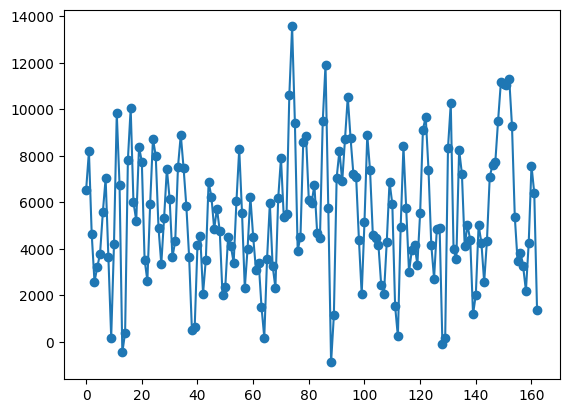

In [46]:
import itertools
#print(bin(int(messages[0],16))[2:],len(raw_messages[0]))
#print(len(raw_messages))
"""new_raw_messages = list()
for i in range(0,len(raw_messages)):
    nulla = (list(itertools.chain.from_iterable(raw_messages[i])))
    new_raw_messages.append(nulla)
raw_messages = new_raw_messages
"""
merged = list(itertools.chain.from_iterable(raw_mess))
plt.plot(merged,marker = "o")
print(len(merged))
#plt.plot(raw_messages[0][52:80],marker="o")
#print(bin(int(messages[16],16))[2:])
"""plt.plot(raw_messages[1][52:80],marker="o")
print(bin(int(messages[1],16))[2:])
plt.plot(raw_messages[2][52:80],marker="o")
print(bin(int(messages[2],16))[2:])"""
"""bits = list()
for n in range(112):
        if (sum(raw_messages[16][4*n:4*n+2]) < sum(raw_messages[16][4*n+2:4*n+4])):
            bits.append(0)
        elif (sum(raw_messages[16][4*n:4*n+2]) > sum(raw_messages[16][4*n+2:4*n+4])):
            bits.append(1)
        else:
            bits.append(-1)
print(len(raw_messages),len(raw_messages[5]))"""

[1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0]

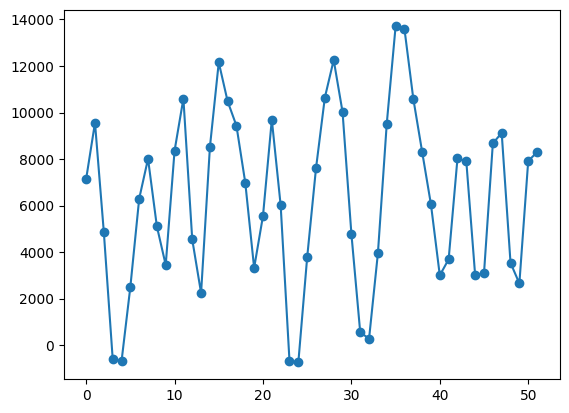

In [91]:
plt.plot(raw_messages[16][:52],marker = "o")
bits = list()
for n in range(13):
        if (sum(raw_messages[16][4*n:4*n+2]) < sum(raw_messages[16][4*n+2:4*n+4])):
            bits.append(0)
        elif (sum(raw_messages[16][4*n:4*n+2]) > sum(raw_messages[16][4*n+2:4*n+4])):
            bits.append(1)
        else:
            bits.append(-1)
bits

In [ ]:
import heapq
n = 1
largest = heapq.nlargest(n, enumerate(conv), key=lambda x: x[1])
n_index, n_value = largest[-1]
max_iq = n_index
print(n_index,n_value)

314 615438.4062268344


In [11]:
max = np.max(iq_samples[arg[max_iq]:arg[max_iq]+len(preamble_df)])
norm = (iq_samples[arg[max_iq]:arg[max_iq]+len(preamble_df)])/max
avg_pre = np.average(norm)
avg_pre

np.float64(0.4807762027248457)

480

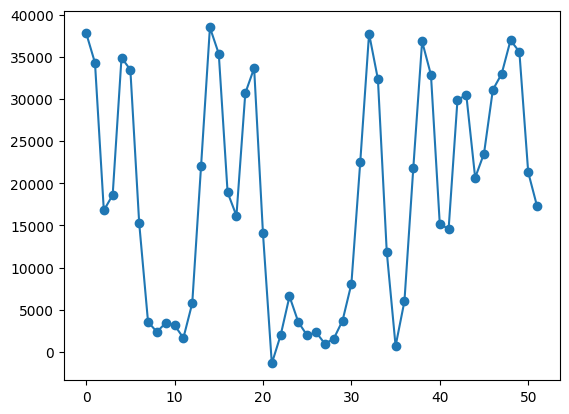

In [12]:
#-----a preamble részhez tartozó minták-----#
start = arg[max_iq]
stop1 = start + math.floor(8*10**-6/Ts)
PREAMBLE = iq_samples[start:stop1]
#----------------DF mintái------------------#
stop2 = stop1 + math.floor(5*10**-6/Ts)
DF = iq_samples[stop1:stop2]
#----------------CA mintái------------------#
stop3 = stop2 + math.floor(3*10**-6/Ts)
CA = iq_samples[stop2:stop3]
#----------------ICAO mintái------------------#
stop4 = stop3 + math.floor(24*10**-6/Ts)
ICAO = iq_samples[stop3:stop4]
#----------------ME mintái------------------#
stop5 = stop4 + math.floor(56*10**-6/Ts)
ME = iq_samples[stop4:stop5]
#----------------PI mintái------------------#
stop6 = stop5 + math.floor(24*10**-6/Ts)
PI = iq_samples[stop5:stop6]
full = np.concatenate([PREAMBLE,DF,CA,ICAO,ME,PI])
plt.plot(full[:len(preamble_df)],marker ="o")
len(full)

In [13]:
"""i = arg[max_iq]
avg_zeros = np.average([iq_samples[i+2],iq_samples[i+3],
                        iq_samples[i+3*2],iq_samples[i+3*2+1],
                        iq_samples[i+4*2],iq_samples[i+4*2+1],
                        iq_samples[i+5*2],iq_samples[i+5*2+1],
                        iq_samples[i+6*2],iq_samples[i+6*2+1],
                        iq_samples[i+10*2],iq_samples[i+10*2+1],
                       iq_samples[i+11*2],iq_samples[i+11*2+1],
                       iq_samples[i+12*2],iq_samples[i+12*2+1],
                       iq_samples[i+13*2],iq_samples[i+13*2+1],
                       iq_samples[i+14*2],iq_samples[i+14*2+1],
                       iq_samples[i+15*2],iq_samples[i+15*2+1]
                       ])
avg_ones = np.average([iq_samples[i],iq_samples[i+1],iq_samples[i+4],iq_samples[i+5],iq_samples[i+7*2],iq_samples[i+7*2+1],iq_samples[i+9*2],
                       iq_samples[i+9*2+1],iq_samples[i+16*2],iq_samples[i+16*2+1],
                       iq_samples[i+19*2],iq_samples[i+19*2+1],iq_samples[i+21*2],iq_samples[i+21*2+1],iq_samples[i+23*2],iq_samples[i+23*2+1],
                       iq_samples[i+24*2],iq_samples[i+24*2+1]
                       ])
LIM = avg_zeros+((avg_ones-avg_zeros)/2)
for i in range(len(full)):
    if full[i] >= LIM:
        full[i] = 1
    else:
        full[i] = 0

plt.plot(full,marker = "o")"""

'i = arg[max_iq]\navg_zeros = np.average([iq_samples[i+2],iq_samples[i+3],\n                        iq_samples[i+3*2],iq_samples[i+3*2+1],\n                        iq_samples[i+4*2],iq_samples[i+4*2+1],\n                        iq_samples[i+5*2],iq_samples[i+5*2+1],\n                        iq_samples[i+6*2],iq_samples[i+6*2+1],\n                        iq_samples[i+10*2],iq_samples[i+10*2+1],\n                       iq_samples[i+11*2],iq_samples[i+11*2+1],\n                       iq_samples[i+12*2],iq_samples[i+12*2+1],\n                       iq_samples[i+13*2],iq_samples[i+13*2+1],\n                       iq_samples[i+14*2],iq_samples[i+14*2+1],\n                       iq_samples[i+15*2],iq_samples[i+15*2+1]\n                       ])\navg_ones = np.average([iq_samples[i],iq_samples[i+1],iq_samples[i+4],iq_samples[i+5],iq_samples[i+7*2],iq_samples[i+7*2+1],iq_samples[i+9*2],\n                       iq_samples[i+9*2+1],iq_samples[i+16*2],iq_samples[i+16*2+1],\n                       

lehet nem kellene a full biteket 01re kvantálni hanem a nyers jel alapján eldönteni hogy 0 vagy 1, 

In [14]:
bits = np.zeros(112,dtype = np.int64)
full_bitek = full
preamble_bits = full_bitek[:16*2]
full_bitek = full_bitek[16*2:]

#-------------------------4 MSPS-------------------------------#
for n in range(112):
    if (sum(full_bitek[4*n:4*n+2]) < sum(full_bitek[4*n+2:4*n+4])):
        bits[n] = 0
    elif (sum(full_bitek[4*n:4*n+2]) > sum(full_bitek[4*n+2:4*n+4])):
        bits[n] = 1
    else:
        bits[n] = -1


In [15]:
df_bits = bits[:5]
#df_bits = ''.join(str(b) for b in df_bits.astype(int))
ca_bits = bits[5:8]
#ca_bits = ''.join(str(b) for b in ca_bits.astype(int))
icao_bits = bits[8:32]
#icao_bits = ''.join(str(b) for b in icao_bits.astype(int))
me_bits = bits[32:88]
pi_bits = bits[88:]
type_code_bits = me_bits[:5]
type_code_bits = ''.join(str(b) for b in type_code_bits.astype(int))
print(df_bits,ca_bits,icao_bits,me_bits,pi_bits,type_code_bits)

[1 0 0 0 1] [1 0 1] [0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1] [0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1] [1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1] 01011


In [ ]:
from crccheck.crc import Crc
ADS_B = Crc(width=24,poly=0x1FFF409,initvalue=0,xor_output=0,reflect_input=False,reflect_output=False)
df_bits_string = ''.join(str(b) for b in df_bits)
ca_bits_string = ''.join(str(b) for b in ca_bits)
icao_bits_string = ''.join(str(b) for b in icao_bits)
me_bits_string = ''.join(str(b) for b in me_bits)
pi_bits_string = ''.join(str(b) for b in pi_bits)
data = df_bits_string+ca_bits_string+icao_bits_string+me_bits_string+pi_bits_string
#print(data)
data = hex(int(data, 2))[2:]
print(data)
if len(data) % 2 != 0:
    data = "0" + data
data_ = bytes.fromhex(data)
remainder = ADS_B.calc(data_)
print("Hibaellenőrzés eredménye: ",remainder)

8d4d20215821b7204a235f9e9ac5
Hibaellenőrzés eredménye:  0


In [2]:
from lut import capability_lut,type_code_lut,df_lut,icao_lut,message_lut
data = "8d4d20215821b7204a235f9e9ac5"
data = bin(int(data,16))[2:]
print(data)
df = data[:5]
ca = data[5:8]
icao = data[8:32]
me = data[32:88]
pi = data[88:]
tc = me[:5]
#print(type_code_lut(tc))
#print(capability_lut(ca))
#print(icao_lut(icao))
print(message_lut(me,tc))

1000110101001101001000000010000101011000001000011011011100100000010010100010001101011111100111101001101011000101
01011000001000011011011100100000010010100010001101011111 11
5675


In [9]:
from lut import type_code_lut,df_lut,icao_lut,message_lut,capability_lut,message_pos_baro_lut,message_velocity_lut
from importlib import reload
# megvan a planes defaultdict
# kiszedtünk belőle 1 üzenetet amely egy hexa string
%load_ext autoreload
%autoreload 2

#data = "8DA05F219B06B6AF189400CBC33F"
data = "8d4d2278990939a938043bf0b993"
data = "8D485020994409940838175B284F"
data = "8d06a30d9915961ff0043d4c35ff"
data = "8d4b9e01990d552438043905a070"
data = "8d4d2278ea485865873c08bdb868"
data = "8d49d361588d07579e2dcd9d02fc" ## ez pozíciós ODD
data = "8d49d361588d0757542dfc7621e8" ## ez is ODD
#data = "8d49d361588d03dec449c54373de" ## EVEN

data = bin(int(data,16))[2:]
df = data[:5]
ca = data[5:8]
icao = data[8:32]
me = data[32:88]
pi = data[88:]
tc = me[:5]

#print(type_code_lut(tc))
#print(capability_lut(ca))
#print(icao_lut(icao))
alt_o,lat_o,lon_o,cpr_o = message_lut(me,tc)
print(alt_o,lat_o,lon_o,cpr_o)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
01011000100011010000011101010111010101000010110111111100 11
altitude: 27000 feet / 8229.6 metres 109482 11772 1


In [11]:
from lut import position
%reload_ext autoreload
lat_e = 126818
lon_e = 18885
#lat_o = 109482
#lon_o = 11772
lat_o = 109519
lon_o = 11725
#alt_e,lat_e,lon_e,cpr_e
#alt_o,lat_o,lon_o,cpr_o
pos = position(lat_e,lat_o,lon_e,lon_o)
print(pos)

{'latitude': '47.805267333984375', 'longitude': '19.296730041503906'}


Hely adatok

In [157]:
from functions import decoder
"""messages = list(["8d4d2278990939a938043bf0b993","8d4d2278ea485865873c08bdb868" ,"8d4d2278f82100020049b86dc770","8d4d2278990939a930043b9e1b9b","8d4d227858bf074ae63937737b7c",
                 '8d4b0292ea234860017f880d7c9c', '8d4b0292ea234860017f880d7c9c', '8d4b02929915440bb0441985272a', '8d4b0292ea234860017f880d7c9c','8d49d361588d07579e2dcd9d02fc',
                 '8d49d3619910dc95980436808bf9','8d49d361588d0757542dfc7621e8','8d49d361f8332002004bb8601190', '8d49d361588d03dec449c54373de'])
messages = list(['8d4d2278990939a938043bf0b993', '8d06a30d9915961ff0043d4c35ff', '8d4b9e01990d552438043905a070', '8d4d2278ea485865873c08bdb868', '8d49d361588d07579e2dcd9d02fc', 
                '8d4b0292ea234860017f880d7c9c', '8d49d3619910dc95980436808bf9', '8d4b0292ea234860017f880d7c9c', '8d49d361588d0757542dfc7621e8', '8d4b02929915440bb0441985272a',
                  '8d49d361f8332002004bb8601190', '8d4d2278f82100020049b86dc770', '8d49d361588d03dec449c54373de', '8d4d2278990939a930043b9e1b9b', '8d4d227858bf074ae63937737b7c', 
                  '8d4b0292ea234860017f880d7c9c', '8d40814258af869c8063413ac8c7'])"""
class plane_pos:
    def __init__(self, icao_, lat_cpr_,lon_cpr_,cpr_):
        self.icao = icao_
        self.lat_cpr = lat_cpr_
        self.lon_cpr = lon_cpr_
        self.cpr = cpr_
    def print_(self):
        print(self.icao,self.lat_cpr,self.lon_cpr,self.cpr)

planes = list()
"""
planes.append(plane_pos(icao_="49d361",lat_cpr_=12,lon_cpr_=18,cpr_="0"))
planes.append(plane_pos(icao_="49d361",lat_cpr_=126818,lon_cpr_=18885,cpr_="1"))"""

for i in messages:
    typecode,cap,icao,mess = decoder(i)
    if (9 <= typecode <= 18):
        planes.append(plane_pos(icao,mess[1],mess[2],mess[3]))

for i in range(len(planes)):
    planes[i].print_()
len(planes)

0

In [158]:
class full_pos():
    def __init__(self,icao_,lat_e_,lon_e_,lat_o_,lon_o_,cntr):
        self.icao = icao_  
        self.lat_e = lat_e_  
        self.lon_e = lon_e_
        self.lat_o = lat_o_
        self.lon_o = lon_o_
        self.cntr = cntr
    def print_(self):
        print("icao: ",self.icao,"lat_e: ",self.lat_e,"lon_e: ",self.lon_e,"lat_o: ",self.lat_o,"lon_o: ",self.lon_o)

full_posik = list()
counter = 1
i = len(planes)-1
while i >= 0:
    found = False
    j = i - 1
    while j >= 0:     
        if (planes[i].icao == planes[j].icao):
            if (planes[i].cpr == "1" and planes[j].cpr == "0"): # 0 even 1 odd
                full_posik.append(full_pos(cntr=counter,icao_=  planes[i].icao,lat_e_=planes[j].lat_cpr,lon_e_ = planes[j].lon_cpr,lat_o_ = planes[i].lat_cpr,lon_o_ = planes[i].lon_cpr))
                counter += 1
                i = j - 1
                found = True
                break
                #print(i.icao,j.lat_cpr, j.lon_cpr, i.lat_cpr,i.lon_cpr)
            if (planes[i].cpr == "0" and planes[j].cpr == "1"):
                full_posik.append(full_pos(cntr=counter,icao_ =planes[i].icao,lat_e_=planes[i].lat_cpr,lon_e_ = planes[i].lon_cpr,lat_o_ = planes[j].lat_cpr,lon_o_ = planes[j].lon_cpr))
                counter += 1
                i = j - 1
                found = True
                break
        j = j - 1
    if not found:
        i = i - 1 

for i in full_posik:
    print(i.print_())
len(full_posik)

0

In [159]:
from lut import position
class coord():
    def __init__(self,x,y):
        self.x = x
        self.y = y

coordinates = list()
for i in full_posik:
    coordinates.append(position(lat_even= i.lat_e ,   lat_odd=i.lat_o    ,   lon_even=i.lon_e   ,   lon_odd=i.lon_o,icao=i.icao,cntr=i.cntr))
    #i.print_()

print(coordinates[0])
len(coordinates)

IndexError: list index out of range

In [64]:
# minden [i][0][latitude] elem latitude éss string
# minden [i][0][longitude] elem longitude és string
# minden [i][1] icao
# midnen [i][2] counter
import folium
import webbrowser
from collections import defaultdict

map = folium.Map(location=[coordinates[0][0]["latitude"],coordinates[0][0]["longitude"]])

utvonal = defaultdict(list)
places = defaultdict(list)
for i in coordinates:
    lat = float(i[0]["latitude"])
    lon = float(i[0]["longitude"])
    utvonal[i[1]].append((lat,lon))
    places[i[1]].append([lat,lon])

for icao, coords in utvonal.items():
    folium.PolyLine(coords, tooltip=icao).add_to(map)
for icao, coords in places.items():
    for i in coords:    
        folium.CircleMarker(location=i,tooltip=icao).add_to(map)

map.save("map4.html")
webbrowser.open("map4.html")

True

Minden más adat ami NEM hely

In [8]:
%reload_ext autoreload
from functions import decoder
for i in messages:
    typecode,cap,icao,mess = decoder(i)
    if typecode == 19:
        print(typecode,icao,mess)


19 4d2278 ('sebesseg: 452.6897392254435knots', 'szog: 136.43209618416466 fok', 'vertikalis sebesseg: 0ft/min', 'subsonic', 'ground speed')
19 4d2278 ('sebesseg: 452.6897392254435knots', 'szog: 136.43209618416466 fok', 'vertikalis sebesseg: 0ft/min', 'subsonic', 'ground speed')
19 4d2278 ('sebesseg: 452.6897392254435knots', 'szog: 136.43209618416466 fok', 'vertikalis sebesseg: 0ft/min', 'subsonic', 'ground speed')
19 6a30d ('sebesseg: 478.05961971285546knots', 'szog: 302.09431228447545 fok', 'vertikalis sebesseg: 0ft/min', 'subsonic', 'ground speed')
19 49d361 ('sebesseg: 277.2381647609146knots', 'szog: 127.82060614811454 fok', 'vertikalis sebesseg: 0ft/min', 'subsonic', 'ground speed')
19 4b9e01 ('sebesseg: 445.58276447816064knots', 'szog: 310.2665616694245 fok', 'vertikalis sebesseg: 0ft/min', 'subsonic', 'ground speed')
19 4d2278 ('sebesseg: 452.6897392254435knots', 'szog: 136.43209618416466 fok', 'vertikalis sebesseg: 0ft/min', 'subsonic', 'ground speed')
19 4d2278 ('sebesseg: 452.6